In [75]:
# Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from pandas.plotting import scatter_matrix

Bitta o'zgaruvchilik - feature dataset ekan. Sodda ekan. Mayli ko'rib chiqaylikchi.

In [ ]:
# Importing the dataset
dataset = pd.read_csv('EXPvsSALARY.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

      Years of Experience  Salary
0                       0    1036
1                       0    1041
2                       0    1054
3                       0    1069
4                       0    1110
...                   ...     ...
4995                   29   99841
4996                   29   99934
4997                   29   99940
4998                   29   99941
4999                   29   99980

[5000 rows x 2 columns]


In [72]:
dataset.head()

,Years of Experience,Salary
0,0,1036
1,0,1041
2,0,1054
3,0,1069
4,0,1110


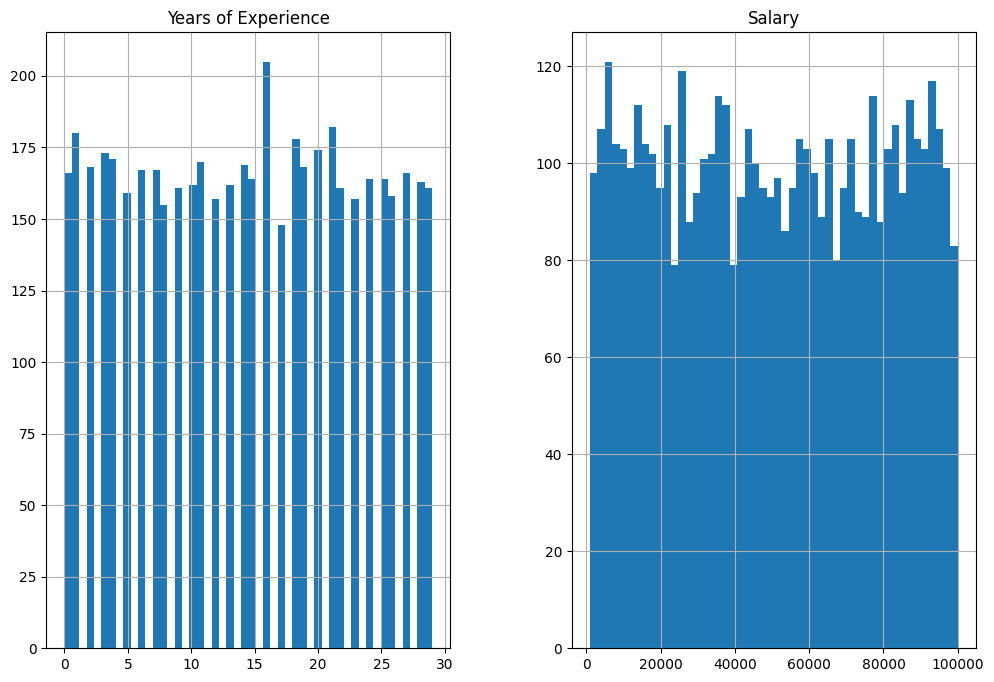

In [73]:
dataset.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
print(X.shape)
print(y.shape)

(5000, 1)
(5000,)


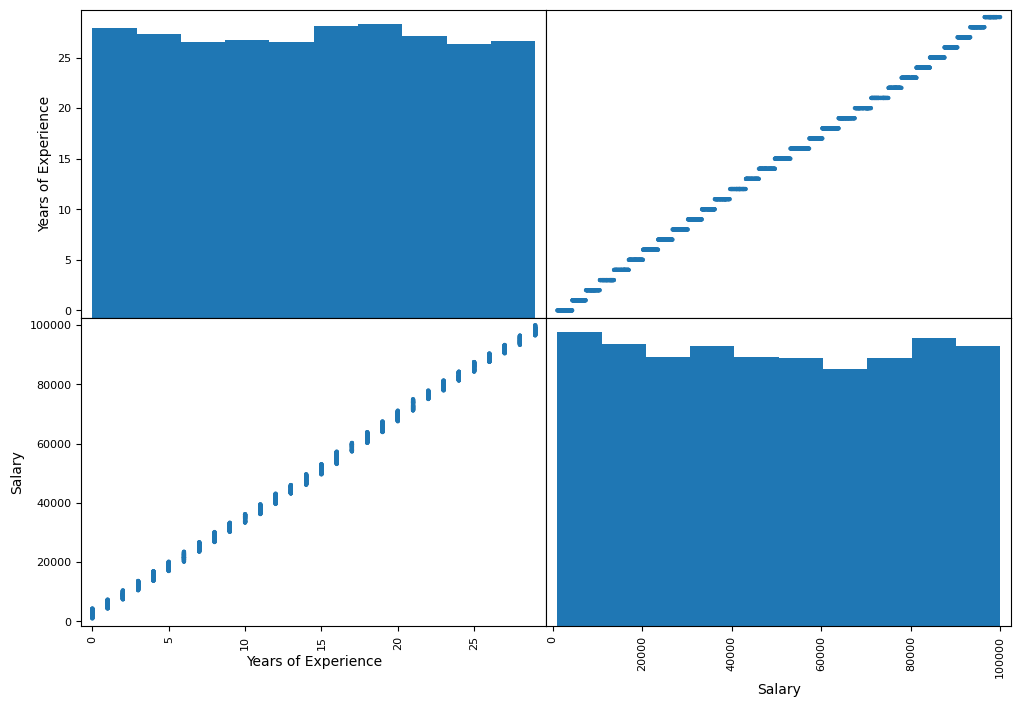

In [76]:
attributes = ['Years of Experience', 'Salary']
scatter_matrix(dataset[attributes], figsize=(12,8))
plt.show()


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Training the Linear Regression model on the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[3342.12210414]
1924.8619188749435


In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

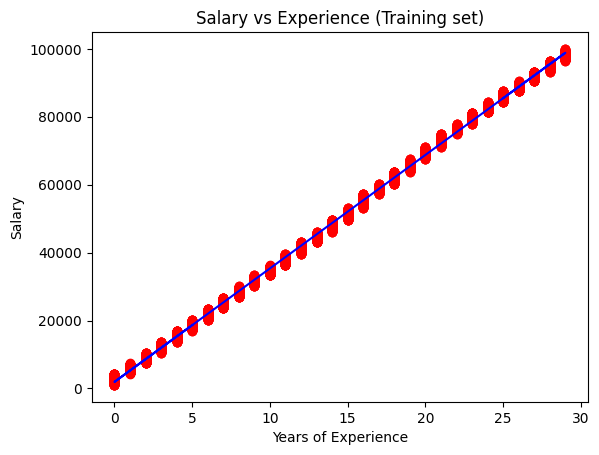

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

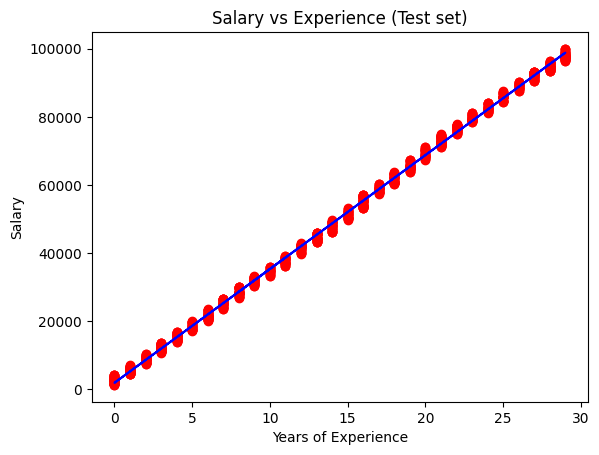

In [ ]:
# Visualising the Test set results - X_test uchun predict qilib chizadi
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

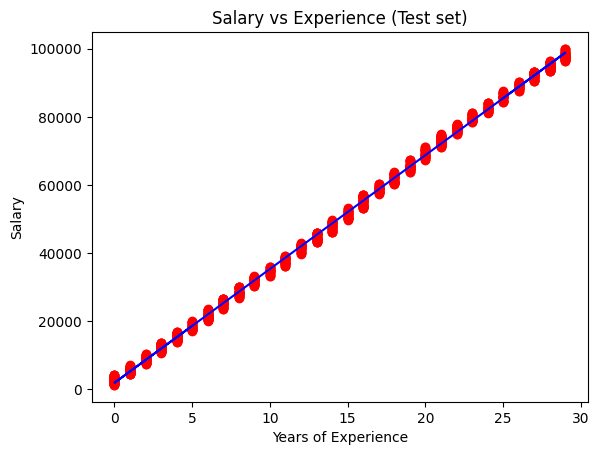

In [ ]:
# Visualising the Test set results - X_train uchun predict qilib chizadi
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_scores = r2_score(y_test, y_pred)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R2: 0.9986014630345507
Mean Squared Error (MSE): 1215754.392159259
Mean Absolute Error (MAE): 909.2234716853723


# Manual way to implement one feature linear regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('EXPvsSALARY.csv')
X = dataset[['Years of Experience']].values # 2D array
y = dataset[['Salary']].values
print(dataset)


      Years of Experience  Salary
0                       0    1036
1                       0    1041
2                       0    1054
3                       0    1069
4                       0    1110
...                   ...     ...
4995                   29   99841
4996                   29   99934
4997                   29   99940
4998                   29   99941
4999                   29   99980

[5000 rows x 2 columns]


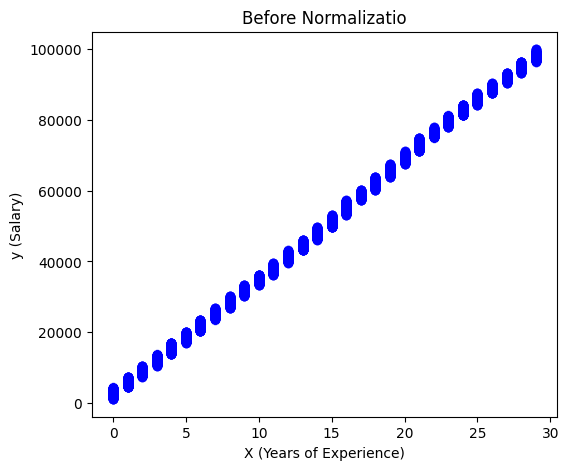

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.title("Before Normalizatio")
plt.xlabel("X (Years of Experience)")
plt.ylabel("y (Salary)")
plt.show()

In [ ]:
X_min, X_max = np.min(X), np.max(X)
X = (X - X_min) / (X_max - X_min)  # Scaling to [0,1]

Y_min, Y_max = np.min(y), np.max(y)
y = (y - Y_min) / (Y_max - Y_min)  # Scaling to [0,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X shape:", X.shape)
print("Y shape:", y.shape)
print("y", y)
print("X", X)

X shape: (5000, 1)
Y shape: (5000, 1)
y [[0.00000000e+00]
 [5.05336352e-05]
 [1.81921087e-04]
 ...
 [9.99595731e-01]
 [9.99605838e-01]
 [1.00000000e+00]]
X [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


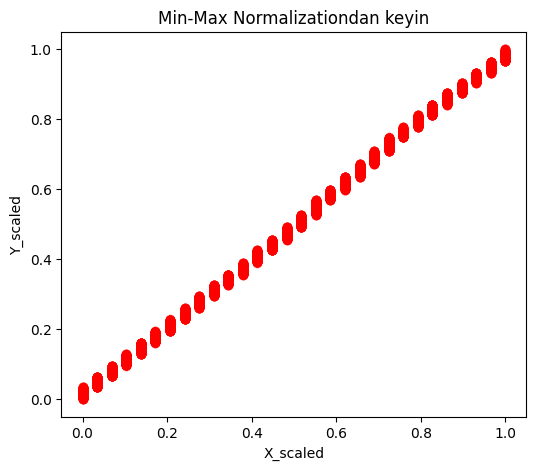

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X, y, color='red', alpha=0.5)
plt.title("Min-Max Normalizationdan keyin")
plt.xlabel("X_scaled")
plt.ylabel("Y_scaled")
plt.show()

In [ ]:
# Assign initial values to parameters
b = 0.5   # Initial intercept
m_ = 0.5  # Initial slope

# Learning rate
alpha = 0.1

# Number of iterations
num_iterations = 1000

N = len(X_train)  # number of samples
# X_train, X_test, y_train, y_tes
for i in range(num_iterations):
    # y_fit = b + m_ * X_train  # Prediction
    y_fit = b + np.dot(X_train, m_)
    error = y_fit - y_train  # Error
    db = (1/N) * np.sum(error)  # ∂J/∂b
    dm = (1/N) * np.sum(error * X_train)  # ∂J/∂m
    b = b - alpha * db
    m_ = m_ - alpha * dm

    if i % 100 == 0:
        cost = (1/(2*N)) * np.sum(error**2)
        print(f"Iteration {i}: cost={cost:.2f}, b={b:.2f}, m={m_:.4f}")

Iteration 0: cost=0.04, b=0.47, m=0.4916
Iteration 100: cost=0.00, b=0.16, m=0.6935
Iteration 200: cost=0.00, b=0.09, m=0.8368
Iteration 300: cost=0.00, b=0.05, m=0.9083
Iteration 400: cost=0.00, b=0.03, m=0.9440
Iteration 500: cost=0.00, b=0.02, m=0.9618
Iteration 600: cost=0.00, b=0.01, m=0.9707
Iteration 700: cost=0.00, b=0.01, m=0.9751
Iteration 800: cost=0.00, b=0.01, m=0.9773
Iteration 900: cost=0.00, b=0.01, m=0.9785


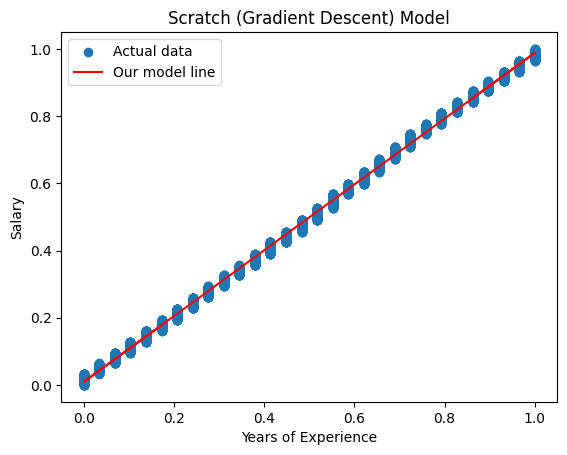

Final parameters (Scratch-GD):
b (intercept) = 0.00928117052226949
m (slope) = 0.9790048791349705
R2: 0.998535386545433
Mean Squared Error (MSE): 0.0001235556912571581
Mean Absolute Error (MAE): 0.009265523423577497


In [ ]:
# Result of our Scratch model
y_fit = b + m_ * X_train

plt.scatter(X_train, y_train, label='Actual data')
plt.plot(X_train, y_fit, label='Our model line', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scratch (Gradient Descent) Model')
plt.legend()
plt.show()


print("Final parameters (Scratch-GD):")
print("b (intercept) =", b)
print("m (slope) =", m_)

mse = mean_squared_error(y_train, y_fit)
mae = mean_absolute_error(y_train, y_fit)
r2_scores = r2_score(y_train, y_fit)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

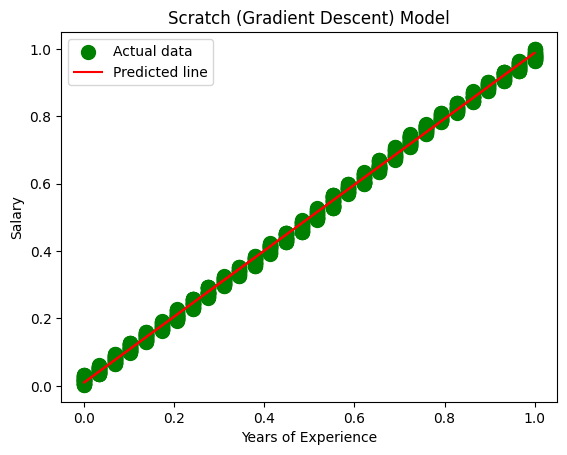

In [ ]:
# 5️⃣ Predicting for a new point
y_pred = b +np.dot(X_test, m_)  # Predicted price
plt.scatter(X_test, y_test, color='green', s=100, label='Actual data')
plt.plot(X_test, y_pred, label='Predicted line', color='red')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scratch (Gradient Descent) Model')
plt.legend()
plt.show()

In [ ]:
# new_y_original = scaler_Y.inverse_transform(new_y.reshape(-1, 1))
# new_y_sk_original = scaler_Y.inverse_transform(new_y_sk)

# # X ni asl qiymatlarga qaytarish
# X_original = X * (X_max - X_min) + X_min

y_pred_original = y_pred * (Y_max - Y_min) + Y_min

# y_test ni asl qiymatlarga qaytarish
y_test_original = y_test * (Y_max - Y_min) + Y_min

In [ ]:
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2_scores = r2_score(y_test_original, y_pred_original)

print("R2:", r2_scores)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R2: 0.9986025901356684
Mean Squared Error (MSE): 1214774.5981543555
Mean Absolute Error (MAE): 909.043218867183


In [ ]:
# Agar y asl maosh birliklarida bo‘lsa
y_mean_original = np.mean(y_test_original)   # inverse transform yoki asl CSV dan
mae_percent = (mae / y_mean_original) * 100
rmse_percent = (rmse / y_mean_original) * 100

print(f"MAE (% of avg salary): {mae_percent:.2f}%")
print(f"RMSE (% of avg salary): {rmse_percent:.2f}%")

MAE (% of avg salary): 1.84%
RMSE (% of avg salary): 2.23%


MAE (% of avg y): 185480.94%
RMSE (% of avg y): 224886.10%


In [ ]:
y_mean_original = np.mean(y_test_original)

# RMSE hisoblash
rmse = np.sqrt(mse)

# Foiz hisoblash
mse_percent = (mse / (y_mean_original**2)) * 100   # MSE kvadrat birlikda → y^2 ga nisbatan
mae_percent = (mae / y_mean_original) * 100
rmse_percent = (rmse / y_mean_original) * 100

r2_scores = r2_score(y_test_original, y_pred_original)

print("R2:", r2_scores)

print(f"MSE (% of avg y²): {mse_percent:.2f}%")
print(f"MAE (% of avg y): {mae_percent:.2f}%")
print(f"RMSE (% of avg y): {rmse_percent:.2f}%")

R2: 0.9986025901356684
MSE (% of avg y²): 0.05%
MAE (% of avg y): 1.84%
RMSE (% of avg y): 2.23%
